In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


In [2]:
#importing file
data=pd.read_excel(r"C:\Users\Hp\Desktop\Final_Target.xlsx")

In [3]:
data.head()

,Unnamed: 0,Customer ID,Order ID,State,PaymentStatus,Order Status,Payment Method,FinalAmt,OrderDate,Courier name,Timestamp,Mode,Complaints_Type,Priority,Resolution Date,Sex,Days_taken,Churn
0,0,493,2095543,Mumbai(Maharashtra),Paid,Delivered,dcc,1701.0,2019-09-20,Delhivery,2019-09-21 00:00:00,Email,Shipping Delay/Issue,High,2019-09-21,1,0,0
1,1,2157,1918551,Tamil Nadu,Refunded,Return Received,Wallet,837.0,2019-07-18,Delhivery,2019-07-30 00:00:00,Email,Ex/Return Request,Low,2019-08-01,1,2,0
2,2,2300,1809194,Maharashtra,Paid,Delivered,Wallet,994.0,2019-06-02,Fedex Economy,2019-06-26 00:00:00,Email,Defective,High,2019-06-27,1,1,0
3,3,2397,1939063,Maharashtra,Paid,Delivered,dcc,1860.0,2019-07-28,Fedex Economy,2019-07-31 00:00:00,Email,Shipping Delay/Issue,High,2019-07-31,1,0,0
4,4,2397,1939063,Maharashtra,Paid,Delivered,dcc,1860.0,2019-07-28,Fedex Economy,2019-07-31 11:23:13,Call,Queries,Low,2019-07-31,1,0,1


In [4]:
data.duplicated().sum()

0

In [5]:
data['Churn'].value_counts()

0    4522
1    3273
Name: Churn, dtype: int64

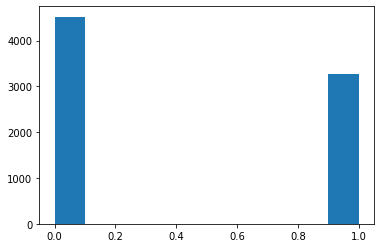

In [6]:
plt.hist(data['Churn'].values)
plt.show()

In [7]:
data.isnull().sum()

Unnamed: 0         0
Customer ID        0
Order ID           0
State              0
PaymentStatus      0
Order Status       0
Payment Method     0
FinalAmt           0
OrderDate          0
Courier name       0
Timestamp          0
Mode               0
Complaints_Type    0
Priority           0
Resolution Date    0
Sex                0
Days_taken         0
Churn              0
dtype: int64

In [8]:
data.head()

,Unnamed: 0,Customer ID,Order ID,State,PaymentStatus,Order Status,Payment Method,FinalAmt,OrderDate,Courier name,Timestamp,Mode,Complaints_Type,Priority,Resolution Date,Sex,Days_taken,Churn
0,0,493,2095543,Mumbai(Maharashtra),Paid,Delivered,dcc,1701.0,2019-09-20,Delhivery,2019-09-21 00:00:00,Email,Shipping Delay/Issue,High,2019-09-21,1,0,0
1,1,2157,1918551,Tamil Nadu,Refunded,Return Received,Wallet,837.0,2019-07-18,Delhivery,2019-07-30 00:00:00,Email,Ex/Return Request,Low,2019-08-01,1,2,0
2,2,2300,1809194,Maharashtra,Paid,Delivered,Wallet,994.0,2019-06-02,Fedex Economy,2019-06-26 00:00:00,Email,Defective,High,2019-06-27,1,1,0
3,3,2397,1939063,Maharashtra,Paid,Delivered,dcc,1860.0,2019-07-28,Fedex Economy,2019-07-31 00:00:00,Email,Shipping Delay/Issue,High,2019-07-31,1,0,0
4,4,2397,1939063,Maharashtra,Paid,Delivered,dcc,1860.0,2019-07-28,Fedex Economy,2019-07-31 11:23:13,Call,Queries,Low,2019-07-31,1,0,1


In [9]:
#label encoding the categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['Mode']=label_encoder.fit_transform(data['Mode'])
data['Complaints_Type']=label_encoder.fit_transform(data['Complaints_Type'])
data['Order Status']=label_encoder.fit_transform(data['Order Status'])
data['PaymentStatus']=label_encoder.fit_transform(data['PaymentStatus'])
data['Payment Method']=label_encoder.fit_transform(data['Payment Method'])
data['Priority']=label_encoder.fit_transform(data['Priority'])
data['Courier name']=label_encoder.fit_transform(data['Courier name'])
data['State']=label_encoder.fit_transform(data['State'])

In [10]:
data.head()

,Unnamed: 0,Customer ID,Order ID,State,PaymentStatus,Order Status,Payment Method,FinalAmt,OrderDate,Courier name,Timestamp,Mode,Complaints_Type,Priority,Resolution Date,Sex,Days_taken,Churn
0,0,493,2095543,22,1,1,9,1701.0,2019-09-20,0,2019-09-21 00:00:00,1,9,0,2019-09-21,1,0,0
1,1,2157,1918551,29,3,5,8,837.0,2019-07-18,0,2019-07-30 00:00:00,1,4,1,2019-08-01,1,2,0
2,2,2300,1809194,18,1,1,8,994.0,2019-06-02,1,2019-06-26 00:00:00,1,3,0,2019-06-27,1,1,0
3,3,2397,1939063,18,1,1,9,1860.0,2019-07-28,1,2019-07-31 00:00:00,1,9,0,2019-07-31,1,0,0
4,4,2397,1939063,18,1,1,9,1860.0,2019-07-28,1,2019-07-31 11:23:13,0,6,1,2019-07-31,1,0,1


In [11]:
#initializing variables
X = data.drop(['State','OrderDate','Timestamp','Resolution Date','Churn'], axis=1)
y = data['Churn']


In [12]:
#splitting into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size = 0.25, random_state = 0)

In [13]:
#standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [14]:
X_train

array([[ 1.24643723e+00,  8.55109008e-01,  1.56164578e-01, ...,
         6.96067456e-01,  3.34725392e-01, -2.58178423e-01],
       [ 1.08805173e+00,  8.31668168e-01, -1.25098298e-01, ...,
        -1.43664237e+00,  3.34725392e-01, -2.58178423e-01],
       [ 1.19590348e-01,  6.68868318e-01, -4.70415882e-01, ...,
        -1.43664237e+00,  3.34725392e-01,  2.81848141e-04],
       ...,
       [-9.99419754e-01, -9.45530175e-01, -4.16635321e-01, ...,
        -1.43664237e+00,  3.34725392e-01, -2.58178423e-01],
       [-5.89019809e-01, -3.09700197e-01, -1.05746744e+00, ...,
        -1.43664237e+00, -2.98752358e+00,  1.61819518e-01],
       [-5.33337404e-01, -2.45178307e-01,  1.49414875e+00, ...,
         6.96067456e-01,  3.34725392e-01, -2.58178423e-01]])

In [15]:
X_test

array([[ 1.56653511,  0.95045613,  1.9168482 , ..., -1.43014422,
         0.34750404, -0.26464279],
       [-0.89639117, -0.74887614, -0.09011997, ..., -1.43014422,
         0.34750404, -0.26464279],
       [-0.47220008, -0.13256024,  1.34009616, ...,  0.69923018,
         0.34750404,  1.59528438],
       ...,
       [-0.53192226, -0.23069343, -0.25633994, ..., -1.43014422,
         0.34750404, -0.26464279],
       [-0.13922848,  0.36693055, -0.57718235, ...,  0.69923018,
         0.34750404, -0.26464279],
       [ 0.97872161,  0.80328079, -0.19410991, ...,  0.69923018,
         0.34750404, -0.26464279]])

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense


In [0]:
classifier = Sequential()
classifier.add(Dense(output_dim=6, init='uniform', activation = 'relu' , input_dim=13))


classifier.add(Dense(output_dim=6, init='uniform', activation = 'relu'))


classifier.add(Dense(output_dim=1, init='uniform', activation = 'sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [0]:
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:


classifier.fit(X_train,y_train,batch_size=50,nb_epoch=30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/30
5846/5846 [==============================] - 0s 74us/step - loss: 0.6751 - accuracy: 0.5783
Epoch 2/30
5846/5846 [==============================] - 0s 58us/step - loss: 0.5159 - accuracy: 0.6606
Epoch 3/30
5846/5846 [==============================] - 0s 64us/step - loss: 0.3398 - accuracy: 0.9371
Epoch 4/30
5846/5846 [==============================] - 0s 61us/step - loss: 0.2080 - accuracy: 0.9891
Epoch 5/30
5846/5846 [==============================] - 0s 59us/step - loss: 0.1168 - accuracy: 0.9967
Epoch 6/30
5846/5846 [==============================] - 0s 57us/step - loss: 0.0669 - accuracy: 0.9974
Epoch 7/30
5846/5846 [==============================] - 0s 52us/step - loss: 0.0422 - accuracy: 0.9979
Epoch 8/30
5846/5846 [==============================] - 0s 52us/step - loss: 0.0292 - accuracy: 0.9979
Epoch 9/30
5846/5846 [==============================] - 0s 54us/step - loss: 0.0212 - accuracy: 0.9981
Epoch 10/30
5846/5846 [==============================] - 0s 57us/step - l

In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))


In [0]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4846153846153846

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       437
           1       1.00      1.00      1.00       343

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780



# Using Random Forest

In [18]:
#parameters for random forest
param_grid = { 'n_estimators': [50, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [21]:
#best parameters
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 50}

In [16]:
#using random forest with best estimators
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='gini',max_depth=8,n_estimators= 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
y_pred= classifier.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1142    0]
 [   0  807]]


In [19]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

# Using XGBoost

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [45]:
y_pred_xgb = xgb.predict(X_test)

In [46]:
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[1142    0]
 [   0  807]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1142
           1       1.00      1.00      1.00       807

    accuracy                           1.00      1949
   macro avg       1.00      1.00      1.00      1949
weighted avg       1.00      1.00      1.00      1949



In [30]:
xgb.score(X_test, y_test)

1.0

# Using KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
#finding best k value
error_rate = []
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

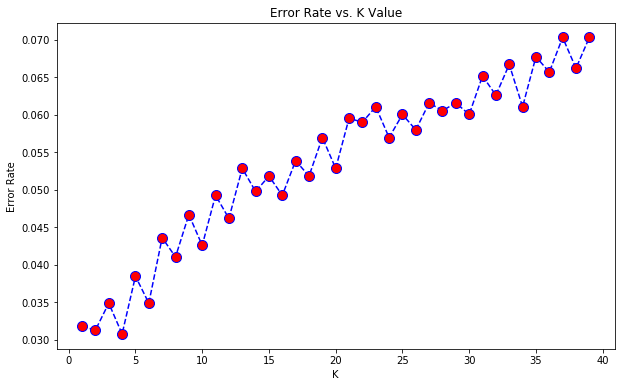

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [38]:
# using knn with k=4
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [39]:
y_pred_knn = knn.predict(X_test)

In [55]:
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[1098   44]
 [  16  791]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1142
           1       0.95      0.98      0.96       807

    accuracy                           0.97      1949
   macro avg       0.97      0.97      0.97      1949
weighted avg       0.97      0.97      0.97      1949



# Using SVM

In [41]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
y_pred_svc = svc.predict(X_test)

In [43]:
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

[[1131   11]
 [   5  802]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1142
           1       0.99      0.99      0.99       807

    accuracy                           0.99      1949
   macro avg       0.99      0.99      0.99      1949
weighted avg       0.99      0.99      0.99      1949



# Logistic Regression 

In [16]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression() 
cls.fit(X_train, y_train) 


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred_lg = cls.predict(X_test) 

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_lg))
print(classification_report(y_test, y_pred_lg))

[[1130   12]
 [   0  807]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1142
           1       0.99      1.00      0.99       807

    accuracy                           0.99      1949
   macro avg       0.99      0.99      0.99      1949
weighted avg       0.99      0.99      0.99      1949



In [0]:
###################################ANN worked best with accuracy 100 with KNN,RF,XGBoost################33
#######################################SVM with TN=3 FP=1 with accuracy 99#####################
#####################################No need of Hyperparameter tuning as model works well on given parameters#################33
#########################RISE AND SHINE##########################33333